(qr-section)=

# QR decomposition

QR decomposition is another decomposition method that factorises a matrix in the product of two matrices $Q$ and $R$ such that

$$ \begin{align*}
    A = QR,
\end{align*} $$

where $Q$ is an orthogonal matrix and $R$ is an upper triangular matrix.

````{prf:definition} Orthogonal vectors
:label: orthogonal-vector-definition

A set of vectors $\lbrace \mathbf{v}_1 ,\mathbf{v}_2 ,\mathbf{v}_3 ,\dots \rbrace$ is said to be **orthogonal** if $\mathbf{v}_i \cdot \mathbf{v}_j =0$ for $i\not= j$. Furthermore the set is said to be **orthonormal** if $\mathbf{v}_i$ are all unit vectors.
````

````{prf:definition} Orthogonal matrix
:label: orthogonal-matrix-definition

An **orthogonal matrix** is a matrix where the columns are a set of orthonormal vectors. If $A$ is an orthogonal matrix if

$$ \begin{align*}
    A^\mathsf{T} A=I.
\end{align*} $$
````

For example consider the matrix

$$ \begin{align*}
    A= \begin{pmatrix}
        0.8 & -0.6\\
        0.6 & 0.8
    \end{pmatrix}.
\end{align*} $$

This is an orthogonal matrix since

$$ \begin{align*}
    A^\mathsf{T} A=\begin{pmatrix}
        0.8 & 0.6\\
        -0.6 & 0.8
    \end{pmatrix}
    \begin{pmatrix}
        0.8 & -0.6\\
        0.6 & 0.8
    \end{pmatrix} = 
    \begin{pmatrix}
        1 & 0\\
        0 & 1
    \end{pmatrix}=I.
\end{align*} $$

Futhermore it is an orthonormal matrix since the magnitude of the columns for $A$ are both 1.

---

(qr-gramschmidt-section)=

## QR decomposition using the Gram-Schmidt process

Consider the $3 \times 3$ matrix $A$ represented as the concatenation of the column vectors $\mathbf{a}_1, \mathbf{a}_2, \mathbf{a}_3$

$$ \begin{pmatrix}
    a_{11} & a_{12} & a_{13} \\
    a_{21} & a_{22} & a_{23} \\
    a_{31} & a_{32} & a_{33}
\end{pmatrix} =
\begin{pmatrix}
    \uparrow & \uparrow & \uparrow \\
    \mathbf{a}_1 & \mathbf{a}_2 & \mathbf{a}_3 \\
    \downarrow & \downarrow & \downarrow
\end{pmatrix} $$

where $\mathbf{a}_j = (a_{1j}, a_{2j}, a_{3j})$. To calculate the orthogonal $Q$ matrix we need a set of vectors $\{\mathbf{q}_1, \mathbf{q}_2, \mathbf{q}_3\}$ that span the same space as $\{\mathbf{a}_1, \mathbf{a}_2, \mathbf{a}_3\}$ but are orthogonal to each other. One way to do this is using the **Gram-Schmidt process**. Consider the diagram shown in {numref}`gram-schmidt-figure` that shows the first two non-orthogonal vectors $\mathbf{a}_1$ and $\mathbf{a}_2$. 

```{figure} ../_images/gram_schmidt.svg
:name: gram-schmidt-figure
:width: 400

The Gram-Schmidt process
```

We begin by letting $\mathbf{u}_1 = \mathbf{a}_1$ and seek to find a vector $\mathbf{u}_2$ that is orthogonal to $\mathbf{u}_1$ and in the same span as $\mathbf{a}_2$. To do this we subtract the <a href="https://en.wikipedia.org/wiki/Vector_projection" target="_blank">vector projection</a> of $\mathbf{a}_2$ onto $\mathbf{u}_1$, i.e.,

$$ \mathbf{u}_2 = \mathbf{a}_2 - \left( \frac{\mathbf{a}_2 \cdot \mathbf{u}_1}{\mathbf{u}_1 \cdot \mathbf{u}_1} \right) \mathbf{u}_1.$$

We can simplify things by normalising $\mathbf{u}_1$ such that $\mathbf{q}_1 = \dfrac{\mathbf{u}_1}{\|\mathbf{u}_1\|}$ so we have

$$ \mathbf{u}_2 = \mathbf{a}_2 - (\mathbf{a}_2 \cdot \mathbf{q}_1) \mathbf{q}_1, $$

which we also normalise to give $\mathbf{q}_2 = \dfrac{\mathbf{u}_2}{\|\mathbf{u}_2\|}$. For the next vector $\mathbf{a}_3$ we want the vector $\mathbf{u}_3$ to be orthogonal to both $\mathbf{q}_1$ and $\mathbf{q}_2$ so we subtract both the vector projections of $\mathbf{a}_3$ onto $\mathbf{q}_1$ and $\mathbf{q}_2$

$$ \mathbf{u}_3 = \mathbf{a}_3 - (\mathbf{a}_3 \cdot \mathbf{q}_1) \mathbf{q}_1 - (\mathbf{a}_3 \cdot \mathbf{q}_2) \mathbf{q}_2, $$

which is normalised to give $\mathbf{q}_3$. Continuing in this way we see that for the $i$-th orthogonal vector we have

$$ \begin{align*}
  \mathbf{u}_i &= \mathbf{a}_i - \sum_{j=1}^{i-1} (\mathbf{a}_i \cdot \mathbf{q}_j) \mathbf{q}_j, \\
  \mathbf{q}_i &= \frac{\mathbf{u}_i}{\| \mathbf{u}_i \|}.
\end{align*} $$

The columns of the $Q$ matrix are formed using the vectors $\mathbf{q}_i$ 

$$ Q = 
\begin{pmatrix}
    \uparrow & \uparrow & & \uparrow \\
    \mathbf{q}_1 & \mathbf{q}_2 & \cdots & \mathbf{q}_n \\
    \downarrow & \downarrow & & \downarrow
\end{pmatrix}. $$

The $R$ matrix is found by rearranging $A = QR$. Since $Q$ is an orthogonal matrix, $Q^\mathsf{T} = Q^{-1}$ so

$$ R = Q^\mathsf{T} A.$$

### Positive diagonal elements of $R$

When we compute the QR decomposition of a matrix we do not get a unique factorisation. Consider $A = QR$ then

$$A = (QD)(D^{-1}R),$$

for any diagonal matrix $D$ with entries $\pm 1$, i.e., multiplying a column of $Q$ by -1 and the corresponding row of $R$ by -1 doesn't change the product $QR$. It has become standard convention to impose a condition that the diagonal elements of $R$ must be positive. This is achieved by computing $D$ where the diagonal elements are $D_{ii} = \operatorname{sign}(R_{ii})$ and calculating $R = DR$ and $Q = QD$.
  
```{prf:algorithm} QR decomposition using the Gram-Schmidt process
:label: qr-gramschmidt-algorithm

**Inputs:** An $m \times n$ matrix $A$.

**Outputs:** An $m \times n$ orthogonal matrix $Q$ and and $n \times n$ upper triangular matrix $R$ such that $A = QR$.

- For $i = 1, \ldots, n$ do
  - $\mathbf{u}_i \gets \mathbf{a}_i - \displaystyle\sum_{j=1}^{i-1} (\mathbf{a}_i \cdot \mathbf{q}_j) \mathbf{q}_j$
  - $\mathbf{q}_i \gets \dfrac{\mathbf{u}_i}{\| \mathbf{u}_i \|}$
- $Q \gets (\mathbf{q}_1, \ldots, \mathbf{q}_n)$
- $R \gets Q^{\mathsf{T}}A$
- $D \gets I_n$
- $D_{ii} \gets \operatorname{sign}(R_{ii})$ &emsp; for $i = 1 \ldots n$
- $R \gets DR$
- $Q \gets QD$
- Return $Q$ and $R$.
```
 
```{prf:example}
:label: qr-gramschmidt-example

Calculate the QR decomposition of the following matrix using the Gram-Schmidt process

$$ \begin{align*}
    A  = \begin{pmatrix}
        -1 & -1 & 1 \\
        1 & 3 & 3 \\
        -1 & -1 & 5 \\
        1 & 3 & 7
    \end{pmatrix}.
\end{align*} $$

---

**Solution**


$$ \begin{align*}
  \mathbf{u}_1 &= \mathbf{a}_1 = \begin{pmatrix} -1 \\ 1 \\ -1 \\ 1 \end{pmatrix}, \\
  \mathbf{q}_1 &= \frac{\mathbf{u}_1}{\| \mathbf{u}_1 \|} = \frac{1}{2} \begin{pmatrix} -1 \\ 1 \\ 1 \\ 1 \end{pmatrix} = \begin{pmatrix} -\frac{1}{2} \\ \frac{1}{2} \\ -\frac{1}{2} \\ \frac{1}{2} \end{pmatrix}, \\
  \mathbf{u}_2 &= \mathbf{a}_2 - (\mathbf{a}_1 \cdot \mathbf{q}_1) \mathbf{q}_1 =
  \begin{pmatrix} -1 \\ 3 \\ -1 \\ 3 \end{pmatrix} - 4 
  \begin{pmatrix} -\frac{1}{2} \\ \frac{1}{2} \\ -\frac{1}{2} \\ \frac{1}{2} \end{pmatrix} =
  \begin{pmatrix} 1 \\ 1 \\ 1 \\ 1 \end{pmatrix}, \\
  \mathbf{q}_2 &= \frac{\mathbf{u}_2}{\| \mathbf{u}_2 \|} = \frac{1}{2} 
  \begin{pmatrix} 1 \\ 1 \\ 1 \\ 1 \end{pmatrix} = 
  \begin{pmatrix} \frac{1}{2} \\ \frac{1}{2} \\ \frac{1}{2} \\ \frac{1}{2} \end{pmatrix}, \\
  \mathbf{u}_3 &= \mathbf{a}_3 - (\mathbf{a}_3 \cdot \mathbf{q}_1) \mathbf{q}_1 - (\mathbf{a}_3 \cdot \mathbf{q}_2) \mathbf{q}_2 =
  \begin{pmatrix} 1 \\ 3 \\ 5 \\ 7 \end{pmatrix} - 2 
  \begin{pmatrix} -\frac{1}{2} \\ \frac{1}{2} \\ -\frac{1}{2} \\ \frac{1}{2} \end{pmatrix} - 8
  \begin{pmatrix} \frac{1}{2} \\ \frac{1}{2} \\ \frac{1}{2} \\ \frac{1}{2} \end{pmatrix} =
  \begin{pmatrix} -2 \\ -2 \\ 2 \\ 2 \end{pmatrix}, \\
  \mathbf{q}_3 &= \frac{\mathbf{u}_3}{\| \mathbf{u}_3 \|} = \frac{1}{4} 
  \begin{pmatrix} -2 \\ -2 \\ 2 \\ 2 \end{pmatrix} =
  \begin{pmatrix} -\frac{1}{2} \\ -\frac{1}{2} \\ \frac{1}{2} \\ \frac{1}{2} \end{pmatrix}.
\end{align*} $$

Therefore 

$$ \begin{align*}
  Q &= \begin{pmatrix}
    -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\
    \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\
    -\frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\
    \frac{1}{2} & \frac{1}{2} & \frac{1}{2}
  \end{pmatrix}, \\
  R &= Q^\mathsf{T}A =
  \begin{pmatrix}
    -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} \\
    \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\
    -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & \frac{1}{2}
  \end{pmatrix}
  \begin{pmatrix}
    -1 & -1 & 1 \\
    1 & 3 & 3 \\
    -1 & -1 & 5 \\
    1 & 3 & 7
  \end{pmatrix} =
  \begin{pmatrix}
    2 & 4 & 2 \\
    0 & 2 & 8 \\
    0 & 0 & 4
  \end{pmatrix}.
\end{align*} $$

All diagonal elements of $R$ are positive so we don't need to calculate $D$.
```

### Code

The code below defines a function called `qr_gramschmidt()` which calculates the QR decomposition of a matrix `A` using the Gram-Schmidt process.

`````{tab-set}
````{tab-item} Python
```python
def qr_gramschmidt(A):
    m, n = A.shape
    Q = np.copy(A).astype(float)
    for i in range(n):
        for j in range(i):
            Q[:,i] -= np.dot(A[:,i], Q[:,j]) * Q[:,j]

        Q[:,i] /= np.linalg.norm(Q[:,i])

    R = np.dot(Q.T, A)
    D = np.diag(np.sign(np.diag(R)))
    R = np.dot(D, R)
    Q = np.dot(Q, D)

    return Q, R
```
````

````{tab-item} MATLAB
```matlab
function [Q, R] = qr_gramschmidt(A)

n = size(A, 2);
Q = A;

for i = 1 : n
    for j = 1 : i - 1
        Q(:,i) = Q(:,i) - dot(A(:,i), Q(:,j)) * Q(:,j);
    end
    Q(:,i) = Q(:,i) / norm(Q(:,i));
end

R = Q' * A;

end
```
````
`````

In [1]:
import numpy as np

def qr_gramschmidt(A):
    m, n = A.shape
    Q = np.copy(A).astype(float)
    for i in range(n):
        for j in range(i):
            Q[:,i] -= np.dot(A[:,i], Q[:,j]) * Q[:,j]

        Q[:,i] /= np.linalg.norm(Q[:,i])

    R = np.dot(Q.T, A)
    D = np.diag(np.sign(np.diag(R)))
    R = np.dot(D, R)
    Q = np.dot(Q, D)

    return Q, R

# Define matrix
A = np.array([[-1, -1, 1], 
              [1, 3, 3], 
              [-1, -1, 5], 
              [1, 3, 7]])

# Calculate QR decomposition
Q, R = qr_gramschmidt(A)
print(f"Q = \n{Q}\n\nR = \n{R}")

Q = 
[[-0.5  0.5 -0.5]
 [ 0.5  0.5 -0.5]
 [-0.5  0.5  0.5]
 [ 0.5  0.5  0.5]]

R = 
[[2. 4. 2.]
 [0. 2. 8.]
 [0. 0. 4.]]


(qr-householder-section)=
## QR decomposition using Householder reflections

Another method we can use to calculate the QR decomposition of a matrix is by the use of **Householder reflections**. 

```{prf:definition} Householder matrix

The Householder matrix is an orthogonal reflection matrix of the form

$$ H = I - 2 \frac{\mathbf{v} \mathbf{v}^\mathsf{T}}{\mathbf{v} \cdot \mathbf{v}}, $$(householder-equation)

where $\mathbf{v}$ is a non-zero vector. The matrix $H$ is symmetric and orthogonal.
```

```{figure} ../_images/householder_1.svg
:name: householder-1-figure
:width: 350

The vector $\mathbf{x}$ is reflected about the dashed line so that it is parallel to the basis vector $\mathbf{e}_1$.
```

Consider the diagram in {numref}`householder-1-figure` where the vector $\mathbf{x}$ is reflected about the hyperplane represented by the dashed line so that it is parallel to the basis vector $\mathbf{e}_1 = (1, 0, \ldots, 0)^\mathsf{T}$. The Householder matrix that achieves this reflection is based on the vector $\mathbf{v}$ which is orthogonal to the dashed line and calculated using

$$ \mathbf{v} = \mathbf{x} - \|\mathbf{x}\|\mathbf{e}_1. $$

To compute the QR decomposition of a matrix $A$, we reflect the first column of $A$, using Householder reflection so that it is parallel to $\mathbf{e}_1$. This means the only non-zero element in the first row.

$$ \begin{align*}
  R = H_1 A = 
  \begin{pmatrix}
    r_{11} & r_{12} & r_{13} & \cdots & r_{1n} \\
    0 & a_{22} & a_{23} & \cdots & r_{2n} \\
    0 & a_{32} & a_{33} & \cdots & a_{3n} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    0 & a_{m2} & a_{m3} & \cdots & a_{mn}
  \end{pmatrix}
\end{align*} $$

We then look to do the same for the sub-matrix of $R$ formed by omitted the first row and column. We do this by calculating a $(m-1) \times (m-1)$ Householder matrix $H'$ using $\mathbf{x} = (a_{22}, a_{32}, \ldots, a_{m2})^\mathsf{T}$. This is used to form the $n \times n$ Householder matrix $H_2$ by padding out the first row and column of the identity matrix.

$$ \begin{align*}
  H_2 = \begin{pmatrix} 
    1 & 0 \\
    0 & H'
  \end{pmatrix}
\end{align*} $$

The Householder matrix $H_2$ is then applied to $R$ so that the second column barring the first row is parallel to $\mathbf{e}_1$. 

$$ \begin{align*}
  R = H_2 R = 
  \begin{pmatrix}
    r_{11} & r_{12} & r_{13} & \cdots & r_{1n} \\
    0 & r_{22} & r_{23} & \cdots & r_{2n} \\
    0 & 0 & a_{33} & \cdots & a_{3n} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    0 & 0 & a_{m3} & \cdots & a_{mn}
  \end{pmatrix}
\end{align*} $$

We repeat this process for all columns in $R$ which results in a triangular matrix. If $A$ has $n$ columns then 

$$R = H_n\ldots H_2 H_1 A,$$

rearranging gives

$$\begin{align*}
  H_1^{-1} H_2^{-1} \ldots H_n^{-1} R = A.
\end{align*} $$

The Householder matrices are symmetric and orthogonal so $H^{-1} = H$ and since we want $A = QR$ then

$$ \begin{align*}
  Q = H_1H_2 \ldots H_n.
\end{align*} $$

```{prf:algorithm} QR decomposition using Householder reflections
:label: qr-householder-algorithm

**Inputs:** An $m \times n$ matrix $A$.

**Outputs:** An $n \times n$ orthogonal matrix $Q$ and and $n \times n$ upper triangular matrix $R$ such that $A = QR$.

- $Q \gets I_m$
- $R \gets A$
- For $i = 1, \ldots, n$ do
  - $\mathbf{x} \gets$ column $i$ of $R$ starting at the $i$-th row
  - $\mathbf{v} \gets \mathbf{x} + \|\mathbf{x}\|\mathbf{e}_1$
  - $H \gets I_m - 2 \dfrac{\mathbf{v} \mathbf{v} ^\mathsf{T}}{\mathbf{v} \cdot \mathbf{v}}$
  - $R \gets H R$
  - $Q \gets Q H$
- $D \gets I_{m}$
- $D_{ii} \gets \operatorname{sign}(R_{ii})$ &emsp; for $i = 1 \ldots n$
- $R \gets DR$
- $Q \gets QD$
- Return $Q$ and $R$
```

```{prf:example}
:label: qr-householder-example

Calculate the QR decomposition of the following matrix using Householder reflections

$$ \begin{align*}
  A=\begin{pmatrix}
    1 & -4 \\
    2 & 3 \\
    2 & 2
  \end{pmatrix}.
\end{align*} $$

---

**Solution**

Set $Q = I$ and $R = A$. We want to zero out the elements below $R_{11}$ so $\mathbf{x} = (1, 2, 2)^\mathsf{T}$ and $\|\mathbf{x}\| = 3$.

$$ \begin{align*}
  \mathbf{v}_1 &= \mathbf{x} + \|\mathbf{x}\| \mathbf{e}_1 =
  \begin{pmatrix} 1 \\ 2 \\ 2 \end{pmatrix} + 3 
  \begin{pmatrix} 1 \\ 0 \\ 0 \end{pmatrix} =
  \begin{pmatrix}  4 \\ 2 \\ 2 \end{pmatrix}, \\
  H_1 &= I - 2\frac{\mathbf{v}_1 \mathbf{v}_1^\mathsf{T}}{\mathbf{v}_1 \cdot \mathbf{v}_1} =
  \begin{pmatrix} 
    1 & 0 & 0 \\
    0 & 1 & 0 \\
    0 & 0 & 1
  \end{pmatrix} - \frac{2}{24}
  \begin{pmatrix} 
    16 & 8 & 8 \\
    8 & 4 & 4 \\
    8 & 4 & 4 
  \end{pmatrix} =
  \begin{pmatrix}
    -\frac{1}{3} & -\frac{2}{3} & -\frac{2}{3} \\
    -\frac{2}{3} &  \frac{2}{3} & -\frac{1}{3} \\
    -\frac{2}{3} & -\frac{1}{3} &  \frac{2}{3}
  \end{pmatrix}, \\
  R &= H_1R = 
  \begin{pmatrix}
    -\frac{1}{3} & -\frac{2}{3} & -\frac{2}{3} \\
    -\frac{2}{3} &  \frac{2}{3} & -\frac{1}{3} \\
    -\frac{2}{3} & -\frac{1}{3} &  \frac{2}{3}
  \end{pmatrix}
  \begin{pmatrix}
    1 & -4 \\
    2 & 3 \\
    2 & 2
  \end{pmatrix} =
  \begin{pmatrix} 
    -3 & -2 \\
    0 & 4 \\
    0 & 3
  \end{pmatrix}, \\
  Q &= QH_1 = 
  \begin{pmatrix} 
    1 & 0 & 0 \\
    0 & 1 & 0 \\
    0 & 0 & 1
  \end{pmatrix}
  \begin{pmatrix}
    -\frac{1}{3} & -\frac{2}{3} & -\frac{2}{3} \\
    -\frac{2}{3} &  \frac{2}{3} & -\frac{1}{3} \\
    -\frac{2}{3} & -\frac{1}{3} &  \frac{2}{3}
  \end{pmatrix} = 
  \begin{pmatrix}
    -\frac{1}{3} & -\frac{2}{3} & -\frac{2}{3} \\
    -\frac{2}{3} &  \frac{2}{3} & -\frac{1}{3} \\
    -\frac{2}{3} & -\frac{1}{3} &  \frac{2}{3}
  \end{pmatrix}.
\end{align*} $$

We want to zero out the elements below $R_{22}$ so $\mathbf{x} = (4, 3)^\mathsf{T}$ and $\| \mathbf{x} \| = 5$

$$ \begin{align*}
  \mathbf{v}_2 &= \mathbf{x} + \| \mathbf{x} \| \mathbf{e}_1 = 
  \begin{pmatrix} 4 \\ 3 \end{pmatrix} + 5 
  \begin{pmatrix} 1 \\ 0 \end{pmatrix} =
  \begin{pmatrix} 9 \\ 3 \end{pmatrix}, \\
  H' &= I - 2\frac{\mathbf{v}_2 \mathbf{v}_2^\mathsf{T}}{\mathbf{v}_2 \cdot \mathbf{v}_2} = 
  \begin{pmatrix} 
    1 & 0 \\
    0 & 1
  \end{pmatrix} - \frac{2}{90} 
  \begin{pmatrix}
    81 & 27 \\ 
    27 & 9
  \end{pmatrix} =
  \begin{pmatrix}
    -\frac{4}{5} & -\frac{3}{5} \\
    -\frac{3}{5} &  \frac{4}{5}
  \end{pmatrix}, \\
  H_2 &=
  \begin{pmatrix}
    1 & 0 & 0 \\
    0 & -\frac{4}{5} & -\frac{3}{5} \\
    0 & -\frac{3}{5} &  \frac{4}{5}
  \end{pmatrix}, \\
  R &= H_2 R = 
  \begin{pmatrix} 
    1 & 0 & 0 \\
    0 & -\frac{4}{5} & -\frac{3}{5} \\
    0 & -\frac{3}{5} &  \frac{4}{5}
  \end{pmatrix}
  \begin{pmatrix} 
    -3 & -2 \\
    0 & 4 \\
    0 & 3
  \end{pmatrix} =
  \begin{pmatrix}
    -3 & -2 \\
     0 & -5 \\
     0 &  0
  \end{pmatrix}, \\
  Q &= Q H_2 =
  \begin{pmatrix}
    -\frac{1}{3} & -\frac{2}{3} & -\frac{2}{3} \\
    -\frac{2}{3} &  \frac{2}{3} & -\frac{1}{3} \\
    -\frac{2}{3} & -\frac{1}{3} &  \frac{2}{3}
  \end{pmatrix}
  \begin{pmatrix} 
    1 & 0 & 0 \\
    0 & -\frac{4}{5} & -\frac{3}{5} \\
    0 & -\frac{3}{5} &  \frac{4}{5}
  \end{pmatrix} =
  \begin{pmatrix}
    -\frac{1}{3} & \frac{14}{15} & -\frac{2}{15} \\
    -\frac{2}{3} & -\frac{1}{3}  & -\frac{2}{3} \\
    -\frac{2}{3} & -\frac{2}{15} & \frac{11}{15}.
  \end{pmatrix}
\end{align*} $$

To make the diagonal elements in $R$ positive we multiply $R$ on the left by $D = \operatorname{diag}(-1, -1, 1)$ and $Q$ on the right by $D$.

$$ \begin{align*}
  R &= DR = 
  \begin{pmatrix} 
    -1 & 0 & 0 \\
    0 & -1 & 0 \\
    0 & 0 & 1
  \end{pmatrix}
  \begin{pmatrix}
    -3 & -2 \\
     0 & -5 \\
     0 &  0
  \end{pmatrix} =
  \begin{pmatrix}
     3 &  2 \\
     0 &  5 \\
     0 &  0
  \end{pmatrix}, \\
  Q &= QD = 
  \begin{pmatrix}
    -\frac{1}{3} & \frac{14}{15} & -\frac{2}{15} \\
    -\frac{2}{3} & -\frac{1}{3}  & -\frac{2}{3} \\
    -\frac{2}{3} & -\frac{2}{15} & \frac{11}{15}.
  \end{pmatrix}
  \begin{pmatrix} 
    -1 & 0 & 0 \\
    0 & -1 & 0 \\
    0 & 0 & 1
  \end{pmatrix} =
  \begin{pmatrix}
    \frac{1}{3} & -\frac{14}{15} & -\frac{2}{15} \\
    \frac{2}{3} & \frac{1}{3}  & -\frac{2}{3} \\
    \frac{2}{3} & \frac{2}{15} & \frac{11}{15}.
  \end{pmatrix}
\end{align*} $$
```

### Code

The code below defines a function called `qr_householder()` that calculates the QR decomposition of an $m \times n$ matrix $A$ using Householder reflections. This has been used to calculate the QR decomposition of the matrix from {prf:ref}`qr-householder-example`.

`````{tab-set}
````{tab-item} Python
```python
def qr_householder(A):
    m, n = A.shape
    Q, R = np.eye(m), np.copy(A)
    for i in range(n):
        x = R[i:,i]
        v = np.array([x + np.sign(x[0]) * np.linalg.norm(x) * np.eye(m-i)[:,0]]).T
        H = np.eye(m)
        H[i:,i:] -= 2 * np.dot(v, v.T) / np.dot(v.T, v)
        R = np.dot(H, R)
        Q = np.dot(Q, H)

    D = np.eye(m)
    D[:n-m,:n-m] = np.diag(np.sign(np.diag(R)))
    R = np.dot(D, R)
    Q = np.dot(Q, D)

    return Q, R
```
````

````{tab-item} MATLAB
```matlab
function [Q, R] = qr_householder(A)

[m, n] = size(A);
Q = eye(m);
R = A;
D = eye(m);

for i = 1 : n
    x = R(i:end,i);
    v = x + sign(x(1)) * norm(x) * [1 ; zeros(m-i,1)];
    H = eye(m);
    H(i:end,i:end) = H(i:end,i:end) - 2 * v * v' / dot(v, v);
    R = H * R;
    Q = Q * H;
    D(i,i) = sign(R(i,i));
end

D = eye(m);
D(1:m-(m-n),1:m-(m-n)) = diag(sign(diag(R)));
R = D * R;
Q = Q * D;

end
```
````
`````

In [2]:
import sympy as sp

def norm(v):
  return sp.sqrt(v.dot(v))

A = sp.Matrix([[1, -4], [2, 3], [2, 2]])

x = A[:,0]
v1 = x + norm(x) * sp.eye(3)[:,0]
sp.pprint(v1)

H1 = sp.eye(3) - 2 * v1 * v1.T / v1.dot(v1)
sp.pprint(H1)

R = H1 * A
Q = sp.eye(3)
Q = Q * H1
sp.pprint(R)
sp.pprint(Q)

x = R[1:,1]
v2 = x + norm(x) * sp.eye(2)[:,0]
sp.pprint(v2)

H2 = sp.eye(3)
H2[1:,1:] -= 2 * v2 * v2.T / v2.dot(v2)
sp.pprint(H2)

R = H2 * R
Q = Q * H2

sp.pprint(R)
sp.pprint(Q)

D = sp.diag(-1, -1, 1)
R = D * R
Q = Q * D

sp.pprint(R)
sp.pprint(Q)


⎡4⎤
⎢ ⎥
⎢2⎥
⎢ ⎥
⎣2⎦
⎡-1/3  -2/3  -2/3⎤
⎢                ⎥
⎢-2/3  2/3   -1/3⎥
⎢                ⎥
⎣-2/3  -1/3  2/3 ⎦
⎡-3  -2⎤
⎢      ⎥
⎢0   4 ⎥
⎢      ⎥
⎣0   3 ⎦
⎡-1/3  -2/3  -2/3⎤
⎢                ⎥
⎢-2/3  2/3   -1/3⎥
⎢                ⎥
⎣-2/3  -1/3  2/3 ⎦
⎡9⎤
⎢ ⎥
⎣3⎦
⎡1   0     0  ⎤
⎢             ⎥
⎢0  -4/5  -3/5⎥
⎢             ⎥
⎣0  -3/5  4/5 ⎦
⎡-3  -2⎤
⎢      ⎥
⎢0   -5⎥
⎢      ⎥
⎣0   0 ⎦
⎡       14         ⎤
⎢-1/3   ──    -2/15⎥
⎢       15         ⎥
⎢                  ⎥
⎢-2/3  -1/3   -2/3 ⎥
⎢                  ⎥
⎢              11  ⎥
⎢-2/3  -2/15   ──  ⎥
⎣              15  ⎦
⎡3  2⎤
⎢    ⎥
⎢0  5⎥
⎢    ⎥
⎣0  0⎦
⎡     -14        ⎤
⎢1/3  ────  -2/15⎥
⎢      15        ⎥
⎢                ⎥
⎢2/3  1/3   -2/3 ⎥
⎢                ⎥
⎢            11  ⎥
⎢2/3  2/15   ──  ⎥
⎣            15  ⎦


In [3]:
import numpy as np

def qr_householder(A):
    m, n = A.shape
    Q, R = np.eye(m), np.copy(A)
    for i in range(n):
        x = R[i:,i]
        v = np.array([x + np.sign(x[0]) * np.linalg.norm(x) * np.eye(m-i)[:,0]]).T
        H = np.eye(m)
        H[i:,i:] -= 2 * np.dot(v, v.T) / np.dot(v.T, v)
        R = np.dot(H, R)
        Q = np.dot(Q, H)

    D = np.eye(m)
    D[:m-(m-n),:m-(m-n)] = np.diag(np.sign(np.diag(R)))
    R = np.dot(D, R)
    Q = np.dot(Q, D)

    return Q, R


# Define matrix
A = np.array([[1, -4],
              [2, 3],
              [2, 2]])

# Calculate QR decomposition
Q, R = qr_householder(A)
print(f"Q = \n{Q}\n\nR = \n{R}")


Q = 
[[ 0.33333333 -0.93333333 -0.13333333]
 [ 0.66666667  0.33333333 -0.66666667]
 [ 0.66666667  0.13333333  0.73333333]]

R = 
[[3.00000000e+00 2.00000000e+00]
 [3.10862447e-16 5.00000000e+00]
 [4.44089210e-17 2.22044605e-16]]


---
## Loss of orthogonality

Like any numerical technique, the QR decomposition methods shown here are prone to computational rounding errors. If $Q$ is perfectly orthogonal then $Q^\mathsf{T}Q = I$, but if there is bound to be some small error. If we let this error be $E$ then $Q^\mathsf{T}Q = I + E$. Rearranging gives

$$ \| Q^\mathsf{T}Q - I\| = E,$$

which is known as the Frobenius norm and is a measure of the **loss of orthogonality**. 

The both QR decomposition methods shown here use an iterative approach where we orthoganlise the columns of the $A$ matrix in turn based upon the previous iterations. So an error in column $i$ will have a knock on effect on all subsequent columns. To anaylse the methods, the QR decomposition of a random $100 \times 100$ matrix $A$ was computed using the Gram-Schmidt process and Householder reflections. The Frobenius norm was calculated for the first $n$ columns of $Q$ where $n = 1 \ldots 100$ giving the loss of orthogonality for those iterations and plotted in below.

```{glue:figure} loss-of-orthogonality-plot
```

Here we can see that computing QR decomposition using Householder reflections is less prone to orthogonality errors than using the Gram-Schmidt process.

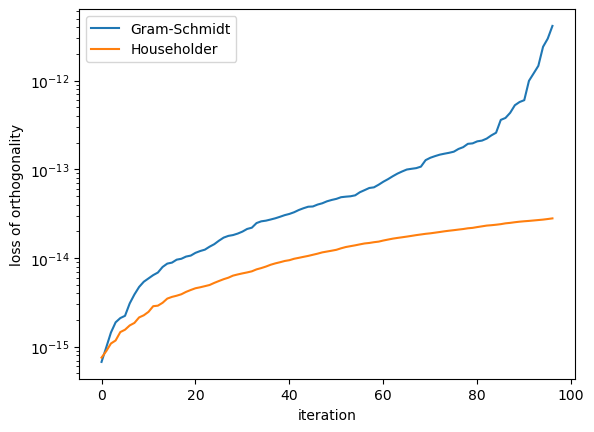

In [4]:
import matplotlib.pyplot as plt

def orthogonality_loss(Q):
    n = Q.shape[1]
    return np.linalg.norm(np.dot(Q.T, Q) - np.eye(n))

sizes = range(1, 101)
loss_gs, loss_hh = [], []

# for n in sizes:
#     A = np.random.rand(n, n)
    
#     Q1, R1 = qr_gramschmidt(A)
#     loss_gs.append(orthogonality_loss(Q1))

#     Q2, R2 = qr_householder(A)
#     loss_hh.append(orthogonality_loss(Q2))

sizes = range(4, 101)
np.random.seed(0)
A = np.random.rand(sizes[-1], sizes[-1])
Q1, R1 = qr_gramschmidt(A)
Q2, R2 = qr_householder(A)
for n in sizes:
    loss_gs.append(orthogonality_loss(Q1[:,:n]))
    loss_hh.append(orthogonality_loss(Q2[:,:n]))


fig, ax = plt.subplots()
plt.semilogy(loss_gs, label='Gram-Schmidt')
plt.semilogy(loss_hh, label='Householder')
plt.legend()
plt.xlabel('iteration')
plt.ylabel('loss of orthogonality')

from myst_nb import glue
glue("loss-of-orthogonality-plot", fig, display=False)